In [46]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
STAD_mutation = pd.read_csv("TCGA.STAD.mutations.txt", sep='\t')

In [22]:
STAD_mutation.columns

Index(['patient_id', 'Hugo_Symbol', 'Entrez_Gene_Id', 'Center', 'NCBI_Build',
       'Chromosome', 'Start_Position', 'End_Position', 'Strand',
       'Variant_Classification', 'Variant_Type', 'Reference_Allele',
       'Tumor_Seq_Allele1', 'Tumor_Seq_Allele2', 'dbSNP_RS',
       'dbSNP_Val_Status', 'Tumor_Sample_Barcode',
       'Matched_Norm_Sample_Barcode', 'Match_Norm_Seq_Allele1',
       'Tumor_Validation_Allele1', 'Tumor_Validation_Allele2', 'HGVSc',
       'HGVSp', 'Transcript_ID', 't_depth', 't_ref_count', 't_alt_count',
       'n_depth', 'Allele', 'Consequence', 'cDNA_position', 'CDS_position',
       'Protein_position', 'Amino_acids', 'Codons', 'Existing_variation',
       'STRAND', 'CANONICAL', 'CCDS', 'ENSP', 'SWISSPROT', 'TREMBL', 'UNIPARC',
       'SIFT', 'PolyPhen', 'DOMAINS', 'IMPACT', 'VARIANT_CLASS', 'FILTER',
       'COSMIC', 'CALLERS', 'CONTEXT', 'NCALLERS'],
      dtype='object')

In [23]:
STAD_mutation[['patient_id', 'Chromosome', 'Start_Position', 'Reference_Allele', 'Tumor_Seq_Allele2']]

,patient_id,Chromosome,Start_Position,Reference_Allele,Tumor_Seq_Allele2
0,TCGA-3M-AB46,10,101560185,G,C
1,TCGA-3M-AB46,10,13264119,T,G
2,TCGA-3M-AB46,10,17737155,G,A
3,TCGA-3M-AB46,10,43693490,G,A
4,TCGA-3M-AB46,10,46321916,G,A
...,...,...,...,...,...
234936,TCGA-ZQ-A9CR,8,77763180,G,T
234937,TCGA-ZQ-A9CR,9,32631933,G,A
234938,TCGA-ZQ-A9CR,X,105179181,A,C
234939,TCGA-ZQ-A9CR,X,135496331,G,A


## Variant class

In [85]:
Variant_class

VARIANT_CLASS
SNV             206291
deletion         23384
insertion         5075
substitution       191
Name: Center, dtype: int64

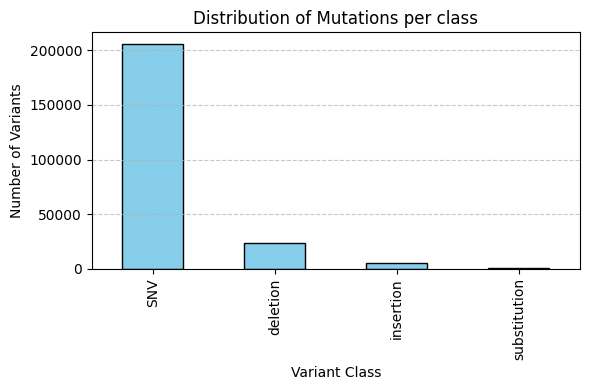

In [93]:
Variant_class = STAD_mutation.groupby("VARIANT_CLASS").count().Center
plt.figure(figsize=(6,4))
Variant_class.plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('Variant Class', fontsize=10)
plt.ylabel('Number of Variants', fontsize=10)
plt.title('Distribution of Mutations per class', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Check distribution of mutations among patient

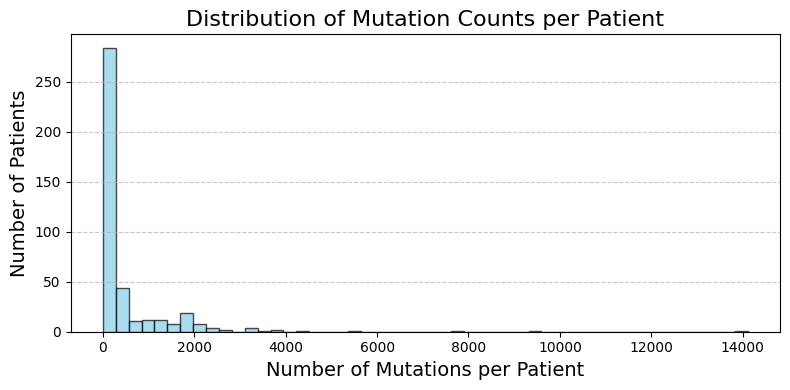

In [50]:
mutation_per_patient = STAD_mutation.groupby("patient_id").count().Center
plt.figure(figsize=(8,4))
plt.hist(mutation_per_patient, bins=50, color='skyblue', edgecolor='black', alpha=0.7)

plt.xlabel('Number of Mutations per Patient', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)
plt.title('Distribution of Mutation Counts per Patient', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Check hyper mutated genes

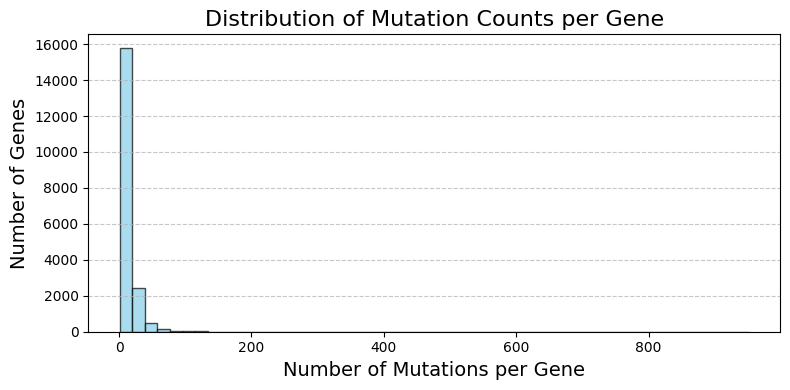

In [53]:
mutation_per_gene = STAD_mutation.groupby("Hugo_Symbol").count().Center
plt.figure(figsize=(8,4))
plt.hist(mutation_per_gene, bins=50, color='skyblue', edgecolor='black', alpha=0.7)

plt.xlabel('Number of Mutations per Gene', fontsize=14)
plt.ylabel('Number of Genes', fontsize=14)
plt.title('Distribution of Mutation Counts per Gene', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [63]:
mutation_per_gene[mutation_per_gene > 300]

Hugo_Symbol
MUC16    368
TTN      951
Name: Center, dtype: int64

# Check known mutations

In [40]:
STAD_mutation[STAD_mutation.COSMIC != "NONE"].COSMIC

9         SITE|p.C124S|c.371G>C|4,CODON|p.0?|c.1_1212del...
43                                CODON|p.Q685*|c.2053C>T|3
73                                BUFFER|p.I88T|c.263T>C|19
83        CODON|p.0?|c.1_1182del1182|6,CODON|p.R283fs*62...
135                               BUFFER|p.A213V|c.638C>T|3
                                ...                        
234849    BUFFER|p.R42C|c.124C>T|5,BUFFER|p.F44F|c.132C>...
234851                            BUFFER|p.F169F|c.507C>T|3
234852    SITE|p.R1007W|c.3019C>T|3,BUFFER|p.R1008W|c.30...
234904    BUFFER|p.S4503G|c.13507A>G|7,BUFFER|p.R4504G|c...
234922                                BUFFER|p.A3V|c.8C>T|3
Name: COSMIC, Length: 13911, dtype: object

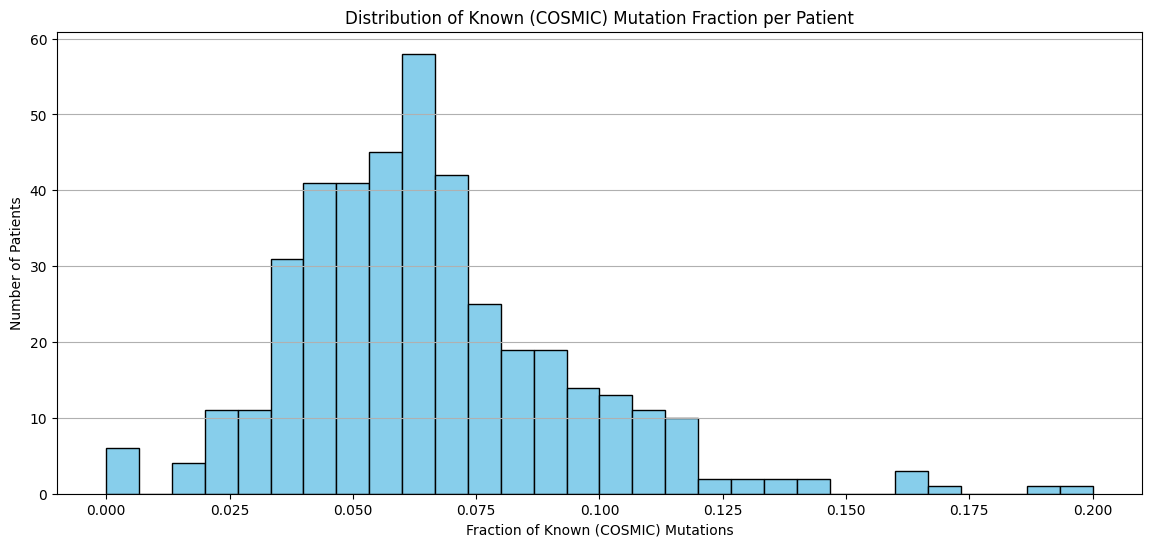

In [47]:
STAD_mutation['COSMIC_status'] = STAD_mutation['COSMIC'].apply(lambda x: 'Known' if x != "NONE" else 'Novel')
mutation_counts = STAD_mutation.groupby('patient_id').COSMIC_status.value_counts().unstack(fill_value=0)
mutation_counts['Total'] = mutation_counts['Known'] + mutation_counts['Novel']
mutation_counts['Fraction_Known'] = mutation_counts['Known'] / mutation_counts['Total']

plt.figure(figsize=(14,6))
mutation_counts['Fraction_Known'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Fraction of Known (COSMIC) Mutations')
plt.ylabel('Number of Patients')
plt.title('Distribution of Known (COSMIC) Mutation Fraction per Patient')
plt.grid(axis='y')
plt.show()

## check variant classification

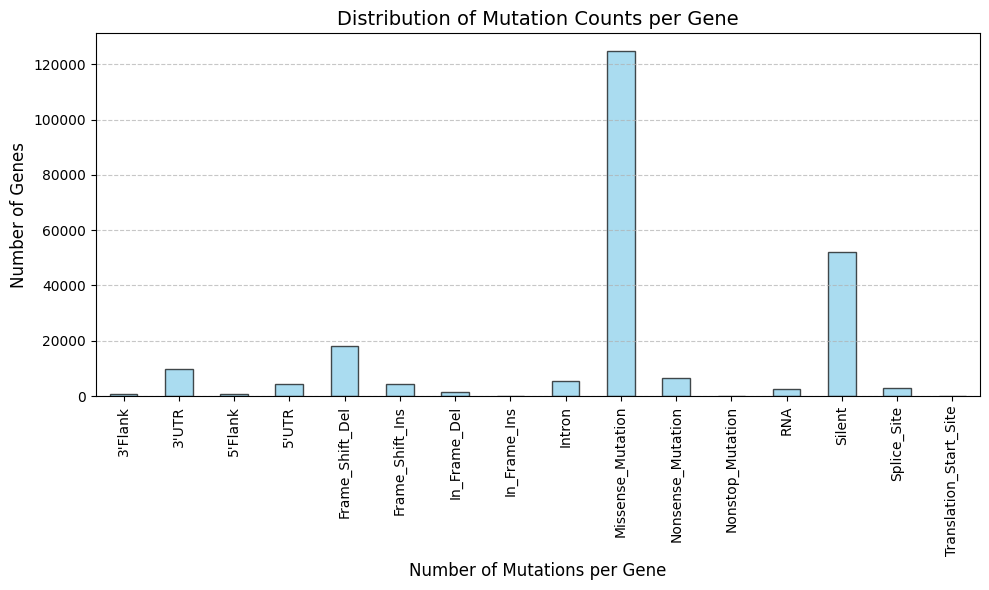

In [101]:
variant_classify = STAD_mutation.groupby("Variant_Classification").count().Center
plt.figure(figsize=(10,6))
variant_classify.plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.7)

plt.xlabel('Number of Mutations per Gene', fontsize=12)
plt.ylabel('Number of Genes', fontsize=12)
plt.title('Distribution of Mutation Counts per Gene', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [103]:
STAD_mutation.columns

Index(['patient_id', 'Hugo_Symbol', 'Entrez_Gene_Id', 'Center', 'NCBI_Build',
       'Chromosome', 'Start_Position', 'End_Position', 'Strand',
       'Variant_Classification', 'Variant_Type', 'Reference_Allele',
       'Tumor_Seq_Allele1', 'Tumor_Seq_Allele2', 'dbSNP_RS',
       'dbSNP_Val_Status', 'Tumor_Sample_Barcode',
       'Matched_Norm_Sample_Barcode', 'Match_Norm_Seq_Allele1',
       'Tumor_Validation_Allele1', 'Tumor_Validation_Allele2', 'HGVSc',
       'HGVSp', 'Transcript_ID', 't_depth', 't_ref_count', 't_alt_count',
       'n_depth', 'Allele', 'Consequence', 'cDNA_position', 'CDS_position',
       'Protein_position', 'Amino_acids', 'Codons', 'Existing_variation',
       'STRAND', 'CANONICAL', 'CCDS', 'ENSP', 'SWISSPROT', 'TREMBL', 'UNIPARC',
       'SIFT', 'PolyPhen', 'DOMAINS', 'IMPACT', 'VARIANT_CLASS', 'FILTER',
       'COSMIC', 'CALLERS', 'CONTEXT', 'NCALLERS', 'COSMIC_status',
       'mutation'],
      dtype='object')

In [68]:
STAD_mutation['mutation'] = STAD_mutation.Reference_Allele + ">" + STAD_mutation.Tumor_Validation_Allele2

In [71]:
STAD_mutation.groupby(["IMPACT"]).count()

,patient_id,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,...,PolyPhen,DOMAINS,VARIANT_CLASS,FILTER,COSMIC,CALLERS,CONTEXT,NCALLERS,COSMIC_status,mutation
IMPACT,,,,,,,,,,,,,,,,,,,,,
HIGH,32199,32199,32199,32199,32199,32199,32199,32199,32199,32199,...,32199,32199,32199,32199,32199,32199,32199,32199,32199,32199
LOW,52887,52887,52887,52887,52887,52887,52887,52887,52887,52887,...,52887,52887,52887,52887,52887,52887,52887,52887,52887,52887
MODERATE,126634,126634,126634,126634,126634,126634,126634,126634,126634,126634,...,126634,126634,126634,126634,126634,126634,126634,126634,126634,126634
MODIFIER,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,...,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221


In [106]:
import numpy as np

In [104]:
STAD_mutation_filtered_pass = STAD_mutation

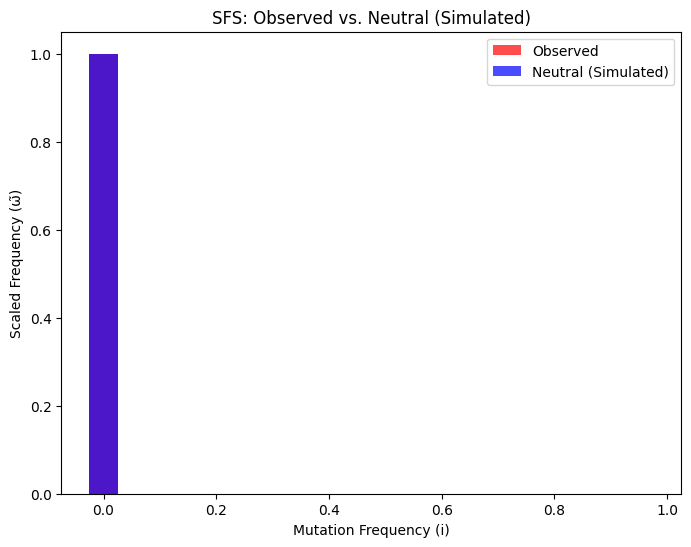

In [124]:
STAD_mutation_filtered_pass['mutation_id'] = STAD_mutation_filtered_pass['Chromosome'].astype(str) + '_' + STAD_mutation_filtered_pass['Start_Position'].astype(str)

mutation_frequencies = STAD_mutation_filtered_pass.groupby('mutation_id').agg({
    'patient_id': 'nunique' 
}).reset_index()

total_samples = STAD_mutation_filtered_pass['patient_id'].nunique()
mutation_frequencies['freq_proportion'] = mutation_frequencies['patient_id'] / total_samples

bins = np.arange(0, 1.05, 0.05) 
mutation_frequencies['freq_bin'] = pd.cut(mutation_frequencies['freq_proportion'], 
                                          bins=bins, 
                                          include_lowest=True, 
                                          labels=bins[:-1])

sfs = mutation_frequencies.groupby('freq_bin').size().reset_index(name='count')
sfs['freq_bin'] = sfs['freq_bin'].astype(float)

total_mutations = len(mutation_frequencies)
sfs['scaled_count'] = sfs['count'] / total_mutations

np.random.seed(123)
n_mutations = len(mutation_frequencies)
neutral_frequencies = np.random.binomial(total_samples, 0.01, n_mutations)
neutral_freq_proportion = neutral_frequencies / total_samples

neutral_df = pd.DataFrame({'freq_proportion': neutral_freq_proportion})
neutral_df['freq_bin'] = pd.cut(neutral_df['freq_proportion'], 
                                bins=bins, 
                                include_lowest=True, 
                                labels=bins[:-1])

neutral_sfs = neutral_df.groupby('freq_bin').size().reset_index(name='count')
neutral_sfs['freq_bin'] = neutral_sfs['freq_bin'].astype(float)
neutral_sfs['scaled_count'] = neutral_sfs['count'] / total_mutations

plt.figure(figsize=(8, 6))
plt.bar(sfs['freq_bin'], sfs['scaled_count'], width=0.05, color='red', alpha=0.7, label='Observed')
plt.bar(neutral_sfs['freq_bin'], neutral_sfs['scaled_count'], width=0.05, color='blue', alpha=0.7, label='Neutral (Simulated)')
plt.xlabel('Mutation Frequency (i)')
plt.ylabel('Scaled Frequency (ω̃)')
plt.title('SFS: Observed vs. Neutral (Simulated)')
plt.legend()
plt.show()

In [110]:
STAD_mutation_filtered_pass = STAD_mutation

In [123]:
STAD_mutation_filtered_pass[['SIFT']]

,SIFT
0,deleterious(0)
1,deleterious(0)
2,deleterious(0)
3,tolerated(0.08)
4,deleterious(0.01)
...,...
234936,.
234937,.
234938,tolerated(0.09)
234939,tolerated(0.05)
